In [9]:
import pickle
import networkx as nx
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import pandas as pd

In [10]:
sns.set_style("whitegrid")
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (6, 2.5)

In [41]:
for kk in [3,4,5,6,7,8,9,10]:
    kk = str(kk)
    print(kk)
    G = pickle.load(open(f'graphs_backbone/G_{kk}.pickle', 'rb'))
    unique_parties = set(dict(G.nodes(data='party')).values())
    
    Gs = []
    dates = []
    for file_path in os.listdir(f'./graphs_backbone/monthly'):
        k = file_path[2:-15]
        if k == kk:
            G = pickle.load(open(f'graphs_backbone/monthly/{file_path}', 'rb'))
            Gs.append(G)
            up = set(dict(G.nodes(data='party')).values())
            unique_parties.update(up)
            date = file_path[-14:-7]
            dates.append(date)
    unique_parties = list(unique_parties)
    unique_parties = [el for el in unique_parties if len(el) > 0]

    d_int_list = []
    d_ext_list = []

    for party in tqdm(unique_parties):
        d_int_party = []
        d_ext_party = []
        for G in Gs:
            adj_matrix = nx.adjacency_matrix(G)
            
            node_index_dict = {}
            i = 0
            for node_id in dict(G.nodes()).keys():
                node_index_dict[node_id] = i
                i += 1
            
            C_ids = []
            for node_id, node_party in dict(G.nodes(data='party')).items():
                if party == node_party:
                    C_ids.append(node_id)

            if len(C_ids) == 0:
                d_int_party.append(None)
                d_ext_party.append(None)
            else:
                C = G.subgraph(C_ids)
                C_adj_matrix = nx.adjacency_matrix(C)
                n_C = C.number_of_nodes()
                d_int = np.sum(C_adj_matrix) / (n_C * (n_C-1))
                d_int_party.append(d_int)


                not_C_ids = list(set(G.nodes()).difference(set(C_ids)))
                n_not_C = len(not_C_ids) 
                d_ext = 0
                for i_node in C_ids:
                    for j_node in not_C_ids:
                        d_ext += adj_matrix[node_index_dict[i_node], node_index_dict[j_node]]
                d_ext = d_ext / (n_C * n_not_C)
                d_ext_party.append(d_ext)

        d_int_list.append(d_int_party)
        d_ext_list.append(d_ext_party)
        
    d_avg_list = []
    for G in tqdm(Gs):
        adj_matrix = nx.adjacency_matrix(G)
        n = G.number_of_nodes()
        d_avg = np.sum(adj_matrix) / (n * (n-1))
        d_avg_list.append(d_avg)
        
    dates_list = [dt.datetime.strptime(date, '%Y_%m').date() for date in dates]
    with open(f'd_int_list_{kk}.pkl', 'wb') as f:
        pickle.dump(d_int_list, f)
    
    with open(f'd_ext_list_{kk}.pkl', 'wb') as f:
        pickle.dump(d_ext_list, f) 

    with open(f'd_avg_list_{kk}.pkl', 'wb') as f:
        pickle.dump(d_avg_list, f)

    with open(f'dates_list_{kk}.pkl', 'wb') as f:
        pickle.dump(dates_list, f)
        
    with open(f'unique_parties_{kk}.pkl', 'wb') as f:
        pickle.dump(unique_parties, f)

3


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]<ipython-input-41-a3ff8bcb1ff8>:28: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(G)
<ipython-input-41-a3ff8bcb1ff8>:46: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  C_adj_matrix = nx.adjacency_matrix(C)
  0%|                                                                                           | 0/46 [00:00<?, ?it/s]<ipython-input-41-a3ff8bcb1ff8>:66: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(G)
100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [00:19<00:00,  2.33it/s]


4


 87%|███████████████████████████████████████████████████████████████████████▎          | 20/23 [08:20<01:01, 20.63s/it]<ipython-input-41-a3ff8bcb1ff8>:48: RuntimeWarning: invalid value encountered in scalar divide
  d_int = np.sum(C_adj_matrix) / (n_C * (n_C-1))
100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [00:20<00:00,  2.34it/s]


5


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.53it/s]


6


100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [00:18<00:00,  2.43it/s]


7


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:20<00:00,  2.31it/s]


8


100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [00:18<00:00,  2.46it/s]


9


100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [00:19<00:00,  2.38it/s]


10


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.15it/s]


In [17]:
df_d_avg = pd.DataFrame()
for k in [3,4,5,6,7,8,9,10]:
    dates_list = pickle.load(open(f'd_cohesion/dates_list_{k}.pkl', 'rb'))
    d_avg = pickle.load(open(f'd_cohesion/d_avg_list_{k}.pkl', 'rb'))
    
    df_help = pd.DataFrame({'k': k, 
                       'dates': dates_list, 
                       'd_avg': np.round(d_avg, 4)
                      })
    df_d_avg = pd.concat([df_d_avg, df_help], ignore_index=True) 

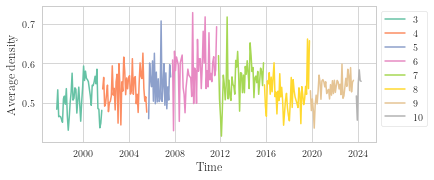

In [21]:
pal = sns.color_palette("Set2", 8)

sns.lineplot(df_d_avg, x='dates', y='d_avg', hue='k', palette=pal)
plt.xlabel('Time')
plt.ylabel('Average density')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('images/measures_in_time/avg_density.pdf', bbox_inches='tight')
plt.show()

In [3]:
df = pd.DataFrame()
for k in [3,4,5,6,7,8,9,10]:
    dates_list = pickle.load(open(f'd_cohesion/dates_list_{k}.pkl', 'rb'))
    d_avg = pickle.load(open(f'd_cohesion/d_avg_list_{k}.pkl', 'rb'))
    d_int = pickle.load(open(f'd_cohesion/d_int_list_{k}.pkl', 'rb'))
    d_ext = pickle.load(open(f'd_cohesion/d_ext_list_{k}.pkl', 'rb'))
    unique_parties = pickle.load(open(f'd_cohesion/unique_parties_{k}.pkl', 'rb'))
    for i in range(len(unique_parties)): 
        df_help = pd.DataFrame({'k': k, 
                       'dates': dates_list, 
                       'party': unique_parties[i],
                       'd_avg': d_avg,
                       'd_int': d_int[i],
                       'd_ext': d_ext[i]
                      })
        df = pd.concat([df, df_help], ignore_index=True) 
df

,k,dates,party,d_avg,d_int,d_ext
0,3,1997-10-01,SLD,0.484024,0.788466,0.22171
1,3,1997-11-01,SLD,0.533307,0.685906,0.37231
2,3,1997-12-01,SLD,0.465135,0.677674,0.246461
3,3,1998-01-01,SLD,0.466323,0.731888,0.179315
4,3,1998-02-01,SLD,0.465031,0.693794,0.289601
...,...,...,...,...,...,...
5077,10,2023-12-01,Polska2050-TD,0.456282,0.961144,0.523895
5078,10,2024-01-01,Polska2050-TD,0.550342,0.920918,0.581151
5079,10,2024-02-01,Polska2050-TD,0.583786,0.91497,0.611494
5080,10,2024-03-01,Polska2050-TD,0.556638,0.955223,0.59584


In [4]:
df['dates'] = pd.to_datetime(df['dates'], format='%Y-%m')
df

,k,dates,party,d_avg,d_int,d_ext
0,3,1997-10-01,SLD,0.484024,0.788466,0.22171
1,3,1997-11-01,SLD,0.533307,0.685906,0.37231
2,3,1997-12-01,SLD,0.465135,0.677674,0.246461
3,3,1998-01-01,SLD,0.466323,0.731888,0.179315
4,3,1998-02-01,SLD,0.465031,0.693794,0.289601
...,...,...,...,...,...,...
5077,10,2023-12-01,Polska2050-TD,0.456282,0.961144,0.523895
5078,10,2024-01-01,Polska2050-TD,0.550342,0.920918,0.581151
5079,10,2024-02-01,Polska2050-TD,0.583786,0.91497,0.611494
5080,10,2024-03-01,Polska2050-TD,0.556638,0.955223,0.59584


In [5]:
df = df.dropna()
df = df.astype({"d_avg":float, "d_avg":float, "d_avg":float}) 

In [6]:
df[df['dates'] == '1997-10-01']

,k,dates,party,d_avg,d_int,d_ext
0,3,1997-10-01,SLD,0.484024,0.788466,0.22171
46,3,1997-10-01,niez.,0.484024,0.429293,0.411267
92,3,1997-10-01,UW,0.484024,0.649426,0.50379
322,3,1997-10-01,ROP,0.484024,0.585859,0.275768
368,3,1997-10-01,AWS,0.484024,0.814466,0.304187
736,3,1997-10-01,PSL,0.484024,0.60537,0.4875


In [ ]:
axs[i].plot(dates_list, d_int_list[i], label=r"$d_{int}(C)$")
axs[i].plot(dates_list, d_ext_list[i], label=r"$d_{ext}(C)$")
axs[i].plot(dates_list, d_avg_list, label=r"$d(G)$")

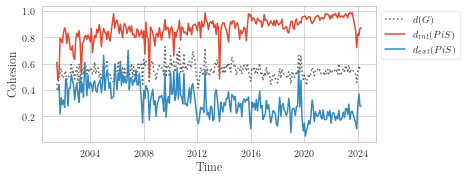

In [55]:
df_p = df[df['party'] == 'PiS']
plt.plot(df_p['dates'], df_p['d_avg'], 'k:', label=r"$d(G)$", alpha=0.6)
sns.lineplot(df_p, x='dates', y='d_int', label=r"$\delta_{int}(PiS)$")
sns.lineplot(df_p, x='dates', y='d_ext', label=r"$\delta_{ext}(PiS)$")
plt.xlabel('Time')
plt.ylabel('Cohesion')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('images/measures_in_time/cohesion_pis.pdf', bbox_inches='tight')
plt.show()

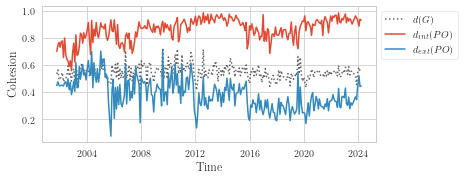

In [54]:
df_p = df[df['party'].isin(['PO', 'PO-KO', 'KO'])]
plt.plot(df_p['dates'], df_p['d_avg'], 'k:', label=r"$d(G)$", alpha=0.6)
sns.lineplot(df_p, x='dates', y='d_int', label=r"$d_{int}(PO)$")
sns.lineplot(df_p, x='dates', y='d_ext', label=r"$d_{ext}(PO)$")
plt.xlabel('Time')
plt.ylabel('Cohesion')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('images/measures_in_time/cohesion_po.pdf', bbox_inches='tight')
plt.show()

In [7]:
from datetime import timedelta

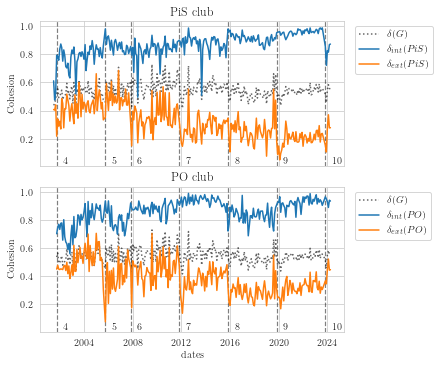

In [12]:
fig, axs = plt.subplots(2, sharey=True, sharex=True, figsize=(6, 5), constrained_layout=True)

df_p = df[df['party'] == 'PiS']

begins = df_p.groupby('k')['dates'].min().values
# for begin in begins:
for i in range(1, len(begins)):
    axs[0].axvline(begins[i], 0, 1, alpha=0.5, c='black', ls='--', lw=1.2)
    axs[1].axvline(begins[i], 0, 1, alpha=0.5, c='black', ls='--', lw=1.2)
    axs[0].annotate(str(i+3), (begins[i]+np.timedelta64(200,'D'), 0.02))
    axs[1].annotate(str(i+3), (begins[i]+np.timedelta64(200,'D'), 0.02))
    
axs[0].plot(df_p['dates'], df_p['d_avg'], 'k:', label=r"$\delta(G)$", alpha=0.6)
sns.lineplot(df_p, x='dates', y='d_int', label=r"$\delta_{int}(PiS)$", ax=axs[0])
sns.lineplot(df_p, x='dates', y='d_ext', label=r"$\delta_{ext}(PiS)$", ax=axs[0])
axs[0].legend(bbox_to_anchor=(1.02, 1))
axs[0].set_ylabel('Cohesion')
axs[0].set_title('PiS club')

df_p = df[df['party'].isin(['PO', 'PO-KO', 'KO'])]
axs[1].plot(df_p['dates'], df_p['d_avg'], 'k:', label=r"$\delta(G)$", alpha=0.6)
sns.lineplot(df_p, x='dates', y='d_int', label=r"$\delta_{int}(PO)$", ax=axs[1])
sns.lineplot(df_p, x='dates', y='d_ext', label=r"$\delta_{ext}(PO)$", ax=axs[1])
axs[1].set_title('PO club')
axs[1].set_ylabel('Cohesion')
axs[1].legend(bbox_to_anchor=(1.02, 1))

plt.savefig('images/measures_in_time/cohesion_po_pis.pdf', bbox_inches='tight')

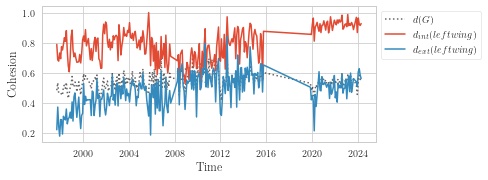

In [58]:
df_p = df[df['party'].isin(['SLD', 'Lewica'])]
plt.plot(df_p['dates'], df_p['d_avg'], 'k:', label=r"$d(G)$", alpha=0.6)
sns.lineplot(df_p, x='dates', y='d_int', label=r"$d_{int}(C)$")
sns.lineplot(df_p, x='dates', y='d_ext', label=r"$d_{ext}(C)$")
plt.xlabel('Time')
plt.ylabel('Cohesion')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('images/measures_in_time/cohesion_left.pdf', bbox_inches='tight')
plt.show()

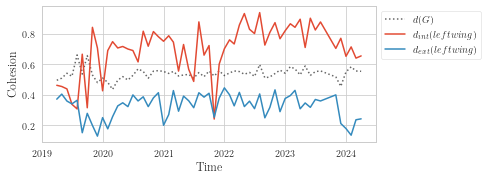

In [59]:
df_p = df[df['party'].isin(['Konfederacja'])]
plt.plot(df_p['dates'], df_p['d_avg'], 'k:', label=r"$d(G)$", alpha=0.6)
sns.lineplot(df_p, x='dates', y='d_int', label=r"$d_{int}(C)$")
sns.lineplot(df_p, x='dates', y='d_ext', label=r"$d_{ext}(C)$")
plt.xlabel('Time')
plt.ylabel('Cohesion')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('images/measures_in_time/cohesion_konfa.pdf', bbox_inches='tight')
plt.show()

In [18]:
kk = '3'

In [19]:
G = pickle.load(open(f'graphs_backbone/G_{kk}.pickle', 'rb'))
unique_parties = set(dict(G.nodes(data='party')).values())
unique_parties # unique party in the whole tenure

{'AWS',
 'Alternatyw',
 'KPN-OP',
 'KdP',
 'PP',
 'PSL',
 'PiS',
 'ROP',
 'ROP-PC',
 'SKL',
 'SLD',
 'UW',
 'niez.'}

In [20]:
Gs = []
dates = []
for file_path in os.listdir(f'./graphs_backbone/monthly'):
    k = file_path[2:-15]
    if k == kk:
        G = pickle.load(open(f'graphs_backbone/monthly/{file_path}', 'rb'))
        Gs.append(G)
        up = set(dict(G.nodes(data='party')).values())
        unique_parties.update(up)
        date = file_path[-14:-7]
        dates.append(date)

unique_parties = list(unique_parties)

In [21]:
unique_parties = [el for el in unique_parties if len(el) > 0]
unique_parties

['SLD',
 'niez.',
 'UW',
 'PRS',
 'KPN-O',
 'NK',
 'PPS-RLP',
 'ROP',
 'AWS',
 'KdP',
 'PP',
 'KPN-OP',
 'PiS',
 'Alternatyw',
 'KPN-Ojcz',
 'ROP-PC',
 'PSL',
 'SKL']

In [22]:
d_int_list = []
d_ext_list = []

for party in tqdm(unique_parties):
    d_int_party = []
    d_ext_party = []
    for G in Gs:
        adj_matrix = nx.adjacency_matrix(G)
        
        C_ids = []
        for node_id, node_party in dict(G.nodes(data='party')).items():
            if party == node_party:
                C_ids.append(node_id)
                
        if len(C_ids) == 0:
            d_int_party.append(None)
            d_ext_party.append(None)
        else:
            C = G.subgraph(C_ids)
            C_adj_matrix = nx.adjacency_matrix(C)
            n_C = C.number_of_nodes()
            d_int = np.sum(C_adj_matrix) / (n_C * (n_C-1))
            d_int_party.append(d_int)


            not_C_ids = list(set(G.nodes()).difference(set(C_ids)))
            n_not_C = len(not_C_ids) 
            d_ext = 0
            for i_node in C_ids:
                for j_node in not_C_ids:
                    d_ext += adj_matrix[i_node, j_node]
            d_ext = d_ext / (n_C * n_not_C)
            d_ext_party.append(d_ext)
    
    d_int_list.append(d_int_party)
    d_ext_list.append(d_ext_party)

  0%|                                                                                           | 0/18 [00:00<?, ?it/s]<ipython-input-22-c714b005c8a0>:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(G)
c:\users\kasia\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
<ipython-input-22-c714b005c8a0>:20: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  C_adj_matrix = nx.adjacency_matrix(C)
<ipython-input-22-c714b005c8a0>:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(G)
100%|██████████████████████████████████████████████████████████████████

In [23]:
d_avg_list = []
for G in tqdm(Gs):
    adj_matrix = nx.adjacency_matrix(G)
    n = G.number_of_nodes()
    d_avg = np.sum(adj_matrix) / (n * (n-1))
    d_avg_list.append(d_avg)

  0%|                                                                                           | 0/46 [00:00<?, ?it/s]<ipython-input-23-b306b25c661f>:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(G)
100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [00:27<00:00,  1.70it/s]


In [24]:
dates_list = [dt.datetime.strptime(date, '%Y_%m').date() for date in dates]

In [25]:
with open(f'd_int_list_{kk}.pkl', 'wb') as f:
    pickle.dump(d_int_list, f)
    
with open(f'd_ext_list_{kk}.pkl', 'wb') as f:
    pickle.dump(d_ext_list, f) 

with open(f'd_avg_list_{kk}.pkl', 'wb') as f:
    pickle.dump(d_avg_list, f)
    
with open(f'dates_list_{kk}.pkl', 'wb') as f:
    pickle.dump(dates_list, f)

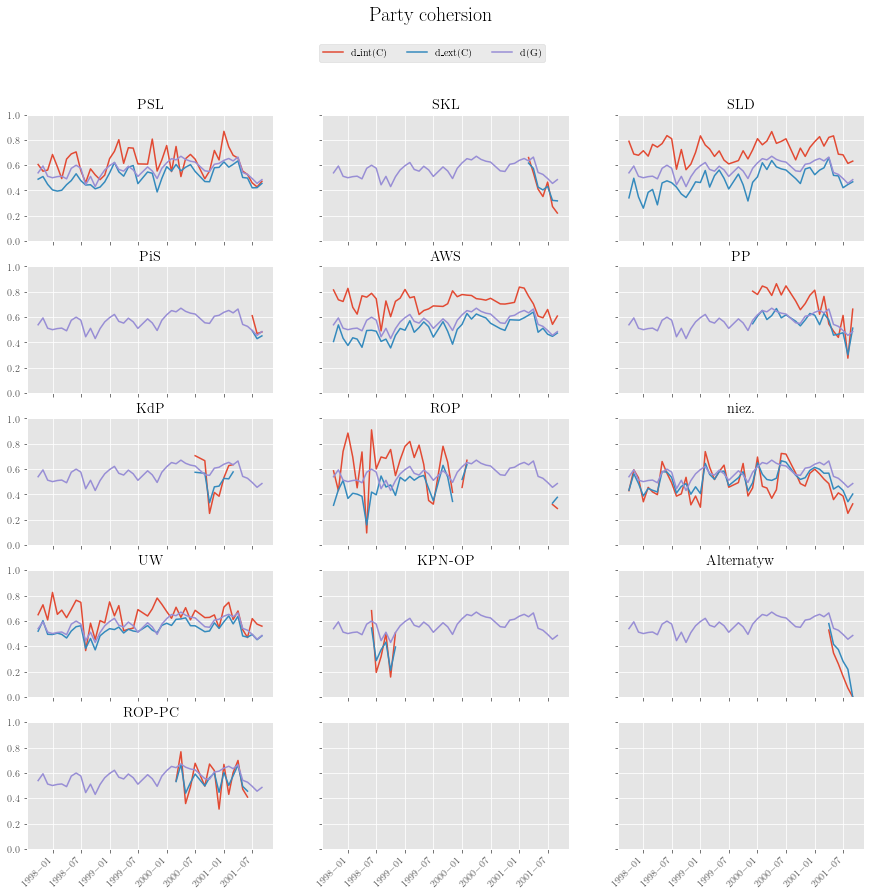

In [116]:
fig, axs = plt.subplots(5, 3, figsize=(15, 15), sharex=True,sharey=True)
fig.autofmt_xdate(bottom=0.2, rotation=45, ha='right')
axs = axs.reshape(-1)
for i in range(len(unique_parties)):
    party = unique_parties[i]

    axs[i].plot(dates_list, d_int_list[i], label=r"$d_{int}(C)$")
    axs[i].plot(dates_list, d_ext_list[i], label=r"$d_{ext}(C)$")
    axs[i].plot(dates_list, d_avg_list, label=r"$d(G)$")
    axs[i].set_title(party)
    axs[i].set_ylim([0, 1])

fig.legend([r'$d_int(C)$', r'$d_ext(C)$', r'$d(G)$'], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.95), fontsize=10)
# fig.suptitle('Party cohersion', fontsize=20)
plt.show()